In [1]:
import scipy.io.wavfile as wavio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv("./data_base_pos_horizontal/samples.csv")

recs = {}

maximum = 0
for idx, row in labels.iterrows():
    sr, data = wavio.read(f"data_base_pos_horizontal/{row.idx}.wav")
    recs[row.q_0] = data[16000:, 1]
    maximum = max(maximum, np.max(np.abs(data[16000:, 1])))

In [3]:
# aud = np.concat([samp[1][:1600] for samp in recs.values()])
# wavio.write("combinedaudio.wav", data=aud, rate=sr)

In [4]:
import librosa

spectras = []
for key, audio in recs.items():
    spectras.append(np.mean(np.abs(librosa.stft(audio/maximum, n_fft=4096)), axis=1))
    print(key)

-1.5708
-1.5066857142857142
-1.4425714285714286
-1.3784571428571428
-1.314342857142857
-1.2502285714285717
-1.1861142857142857
-1.122
-1.0578857142857143
-0.9937714285714284
-0.9296571428571428
-0.8655428571428571
-0.8014285714285715
-0.7373142857142857
-0.6732
-0.6090857142857142
-0.5449714285714287
-0.4808571428571428
-0.4167428571428571
-0.3526285714285715
-0.2885142857142857
-0.2243999999999999
-0.1602857142857141
-0.0961714285714285
-0.032057142857143
0.0320571428571427
0.0961714285714285
0.1602857142857143
0.2243999999999999
0.2885142857142855
0.3526285714285715
0.4167428571428573
0.4808571428571426
0.5449714285714287
0.6090857142857142
0.6732000000000002
0.7373142857142858
0.8014285714285714
0.865542857142857
0.929657142857143
0.9937714285714284
1.057885714285714
1.122
1.1861142857142857
1.2502285714285717
1.3143428571428568
1.3784571428571428
1.4425714285714288
1.506685714285714
1.5708


In [5]:
spectras[0]

array([2.41927357, 4.75651392, 7.02744535, ..., 0.13338197, 0.11425772,
       0.1077402 ])

In [6]:
spectrum = np.hstack([spec[:,None] for spec in spectras])

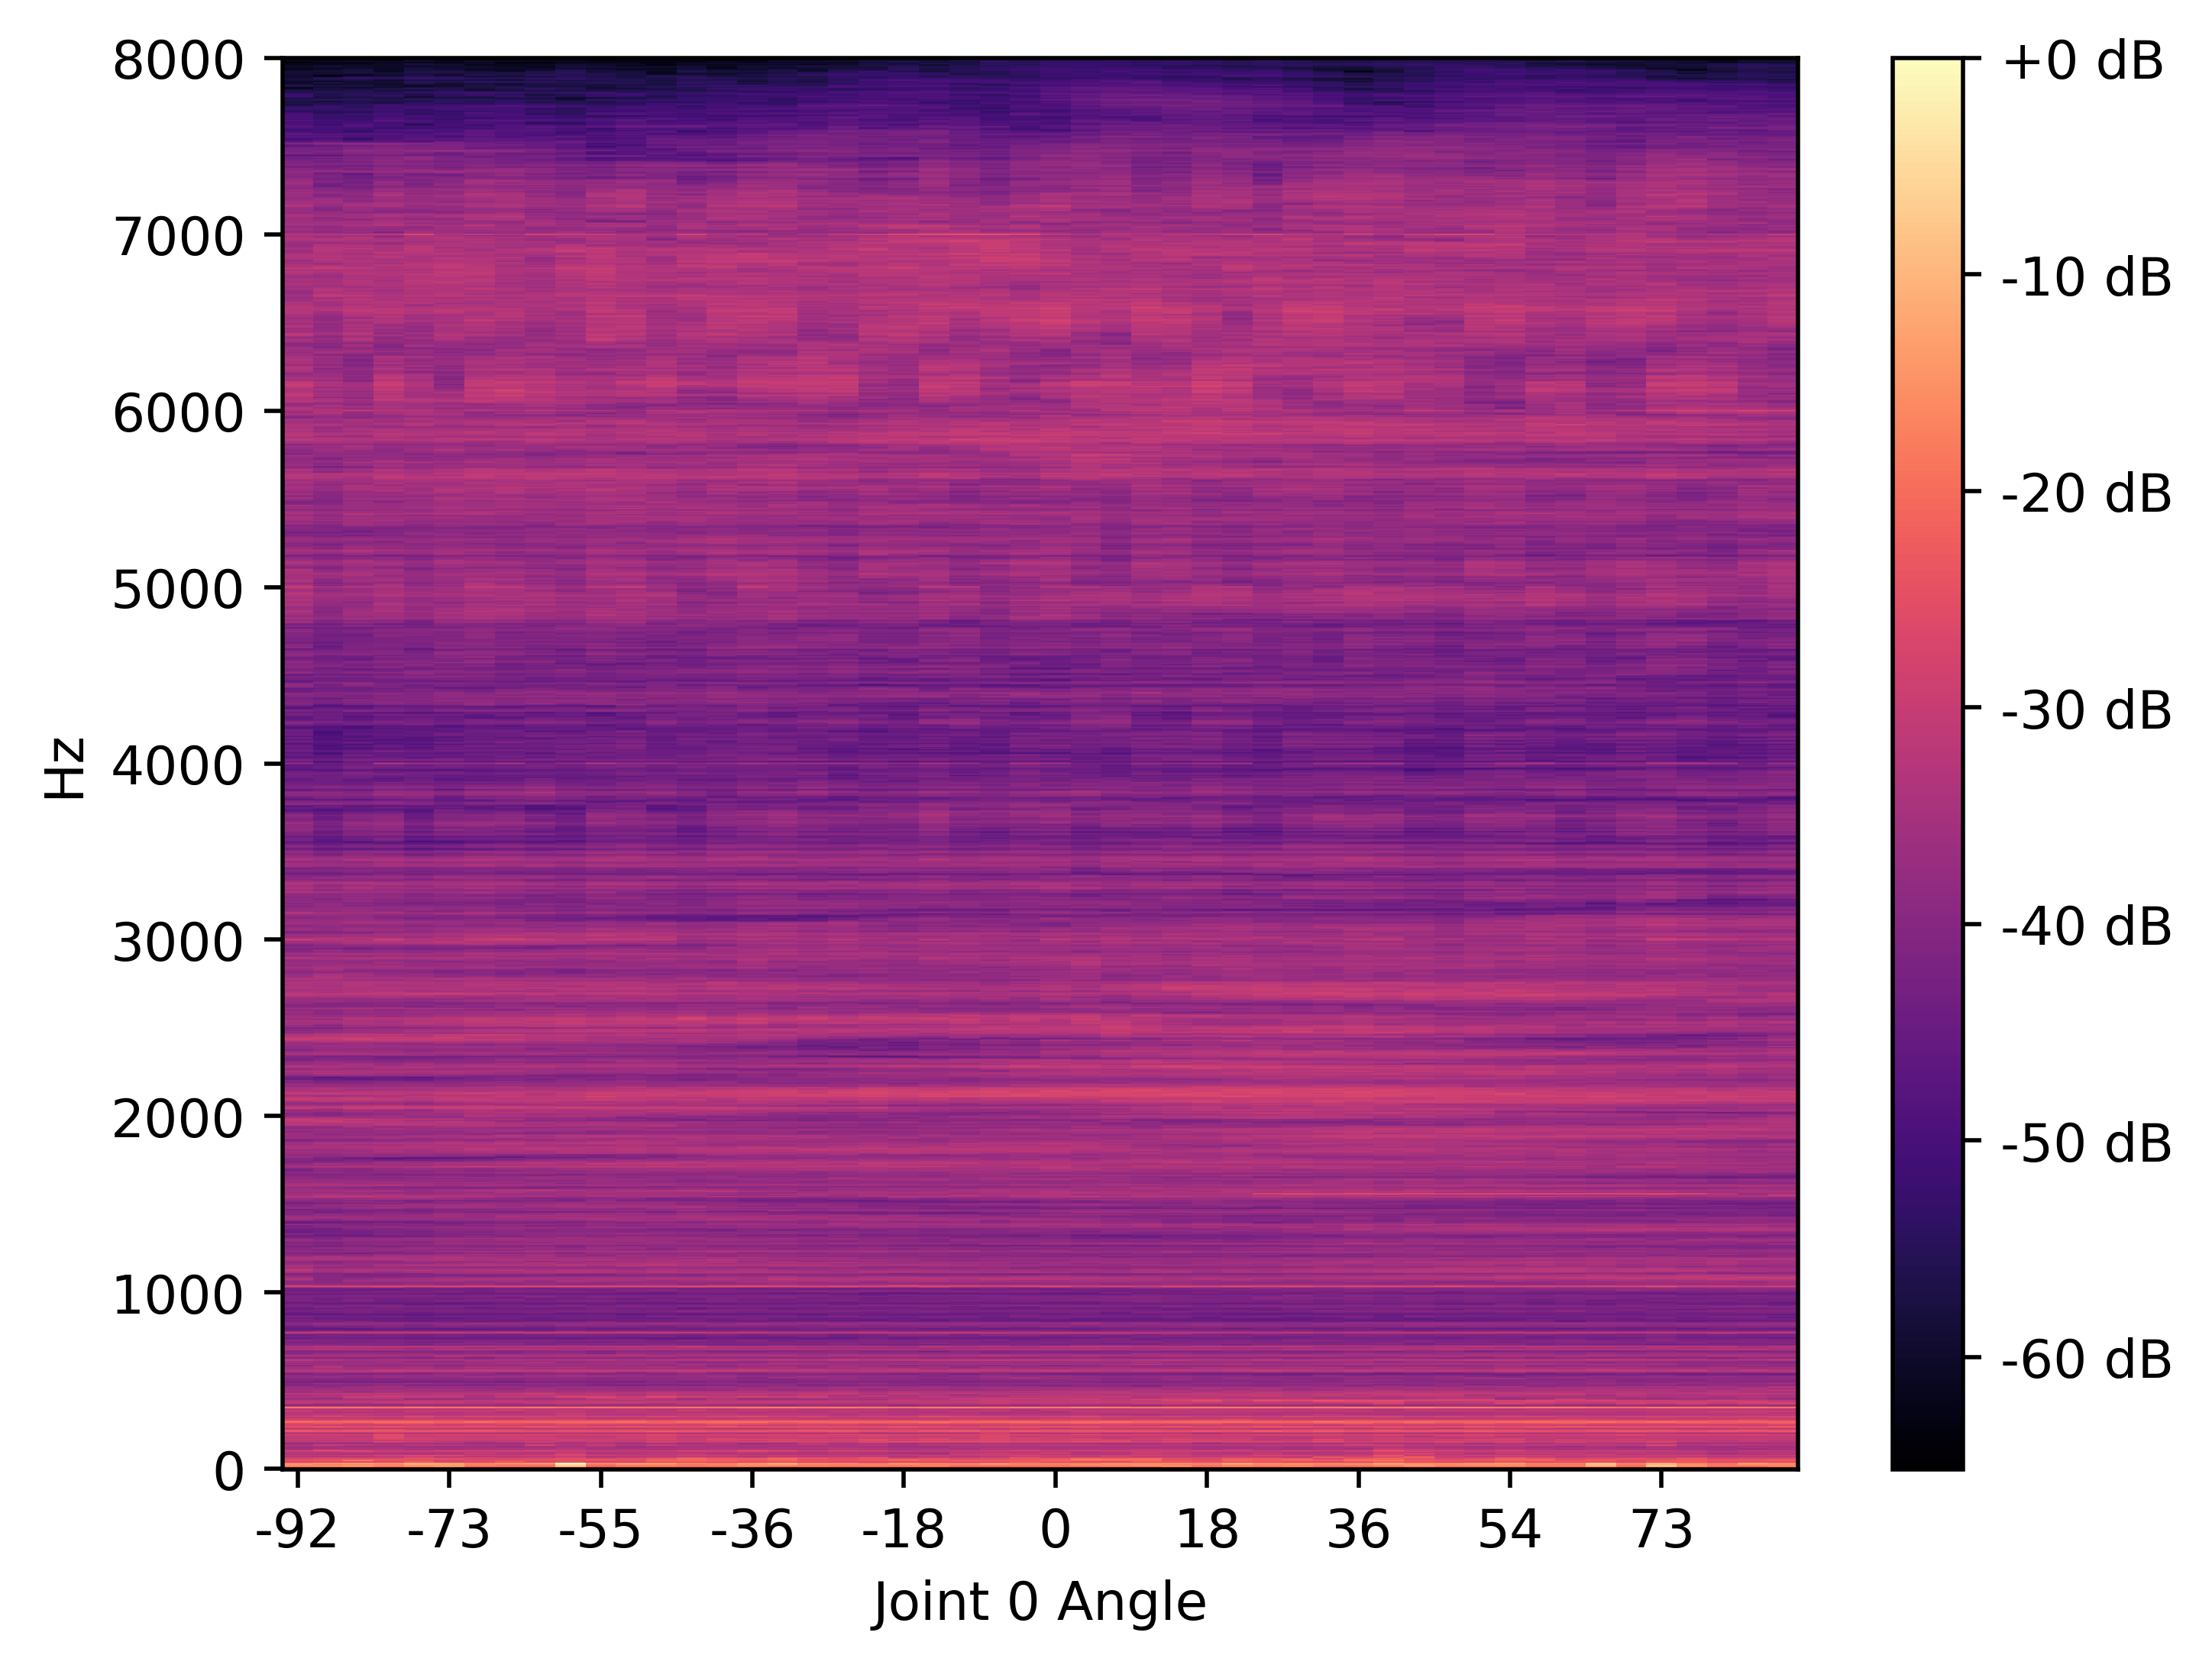

In [13]:
angle = np.rad2deg(np.linspace(-1.5708,1.5708,50))
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="hz", n_fft=4096, x_coords=np.arange(50), x_axis="s") #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, _: f"{int(angle[min(int(x), 49)]-2)}")
ax.set_xlabel("Joint 0 Angle")
fig.set_dpi(500)

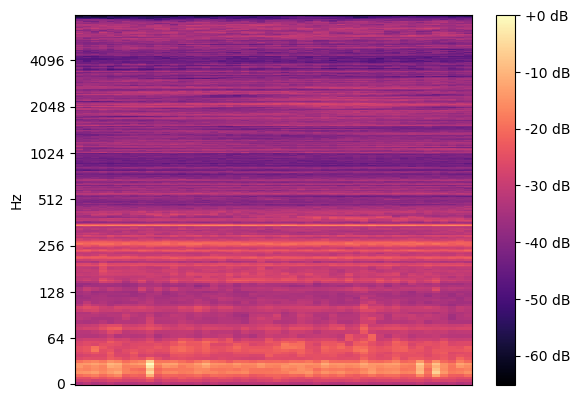

In [7]:
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="log", n_fft=4096) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

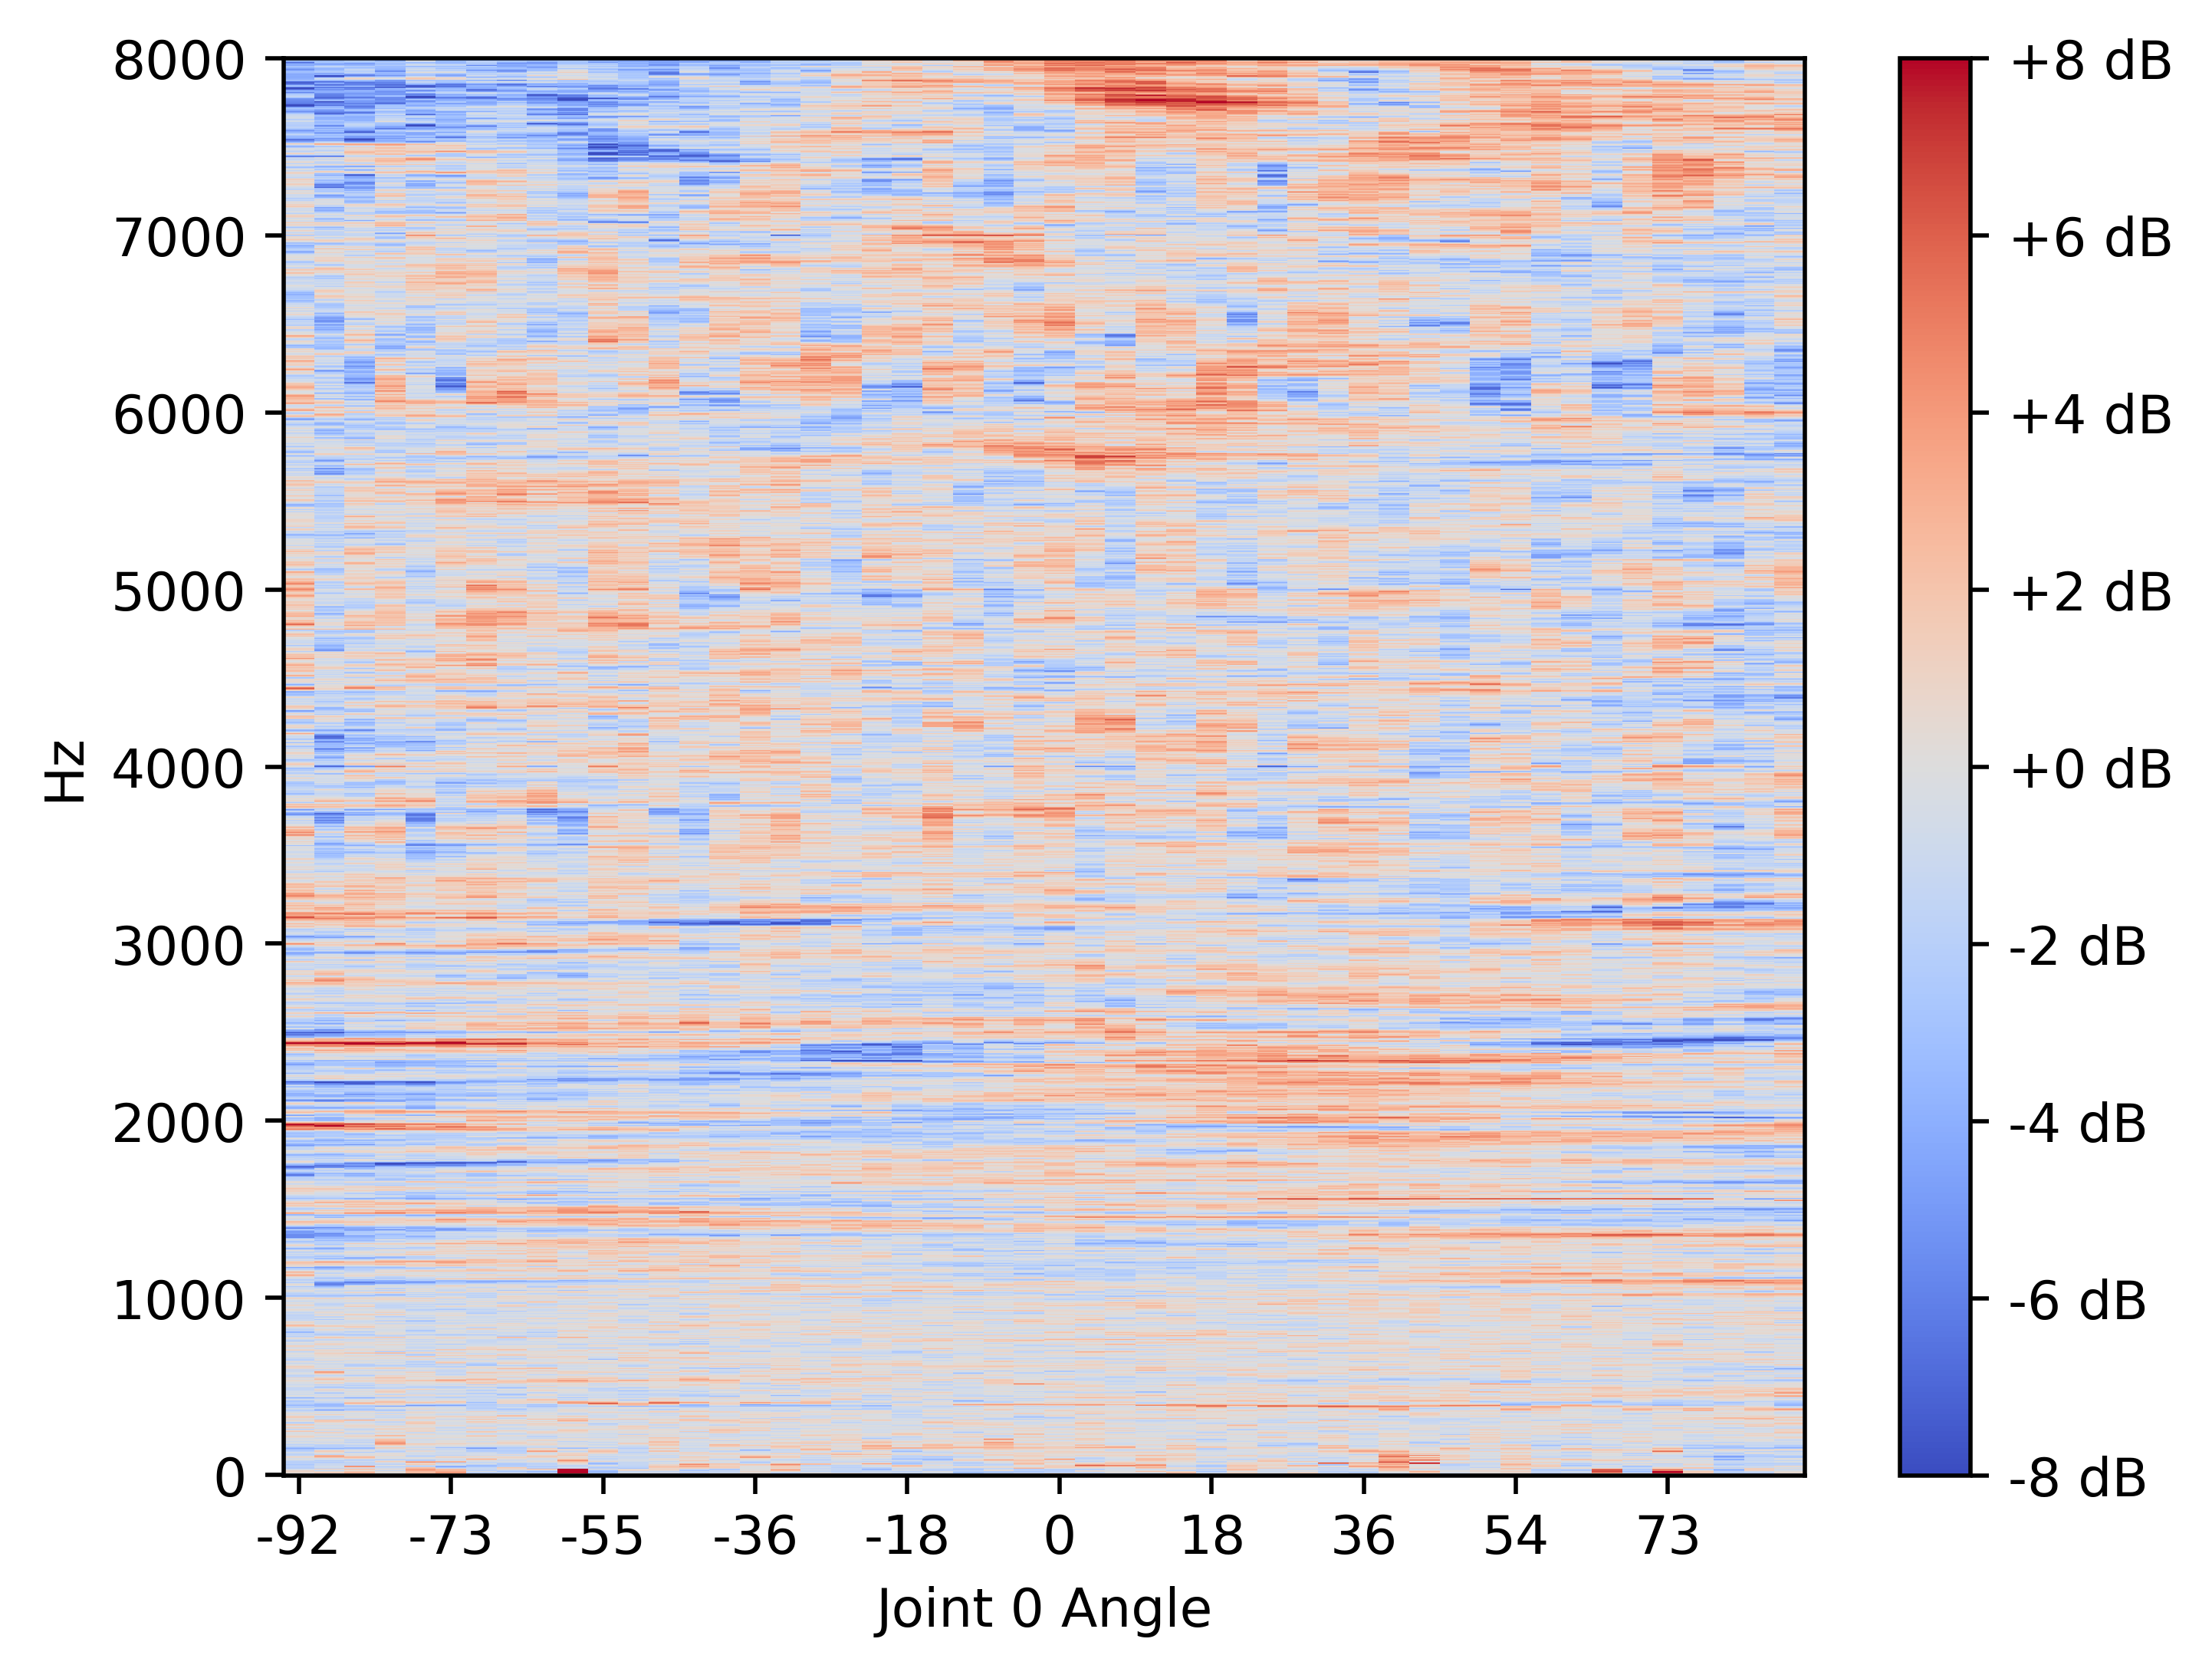

In [14]:
angle = np.rad2deg(np.linspace(-1.5708,1.5708,50))
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db-np.mean(S_db, axis=1)[:,None], sr=sr, ax=ax, y_axis="hz", n_fft=4096, vmin=-8, vmax=8,x_coords=np.arange(50), x_axis="s") #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, _: f"{int(angle[min(int(x), 49)]-2)}")
ax.set_xlabel("Joint 0 Angle")
fig.set_dpi(500)

In [30]:
np.linspace(0,8000, S_db.shape[0])[103]

np.float64(402.34375)

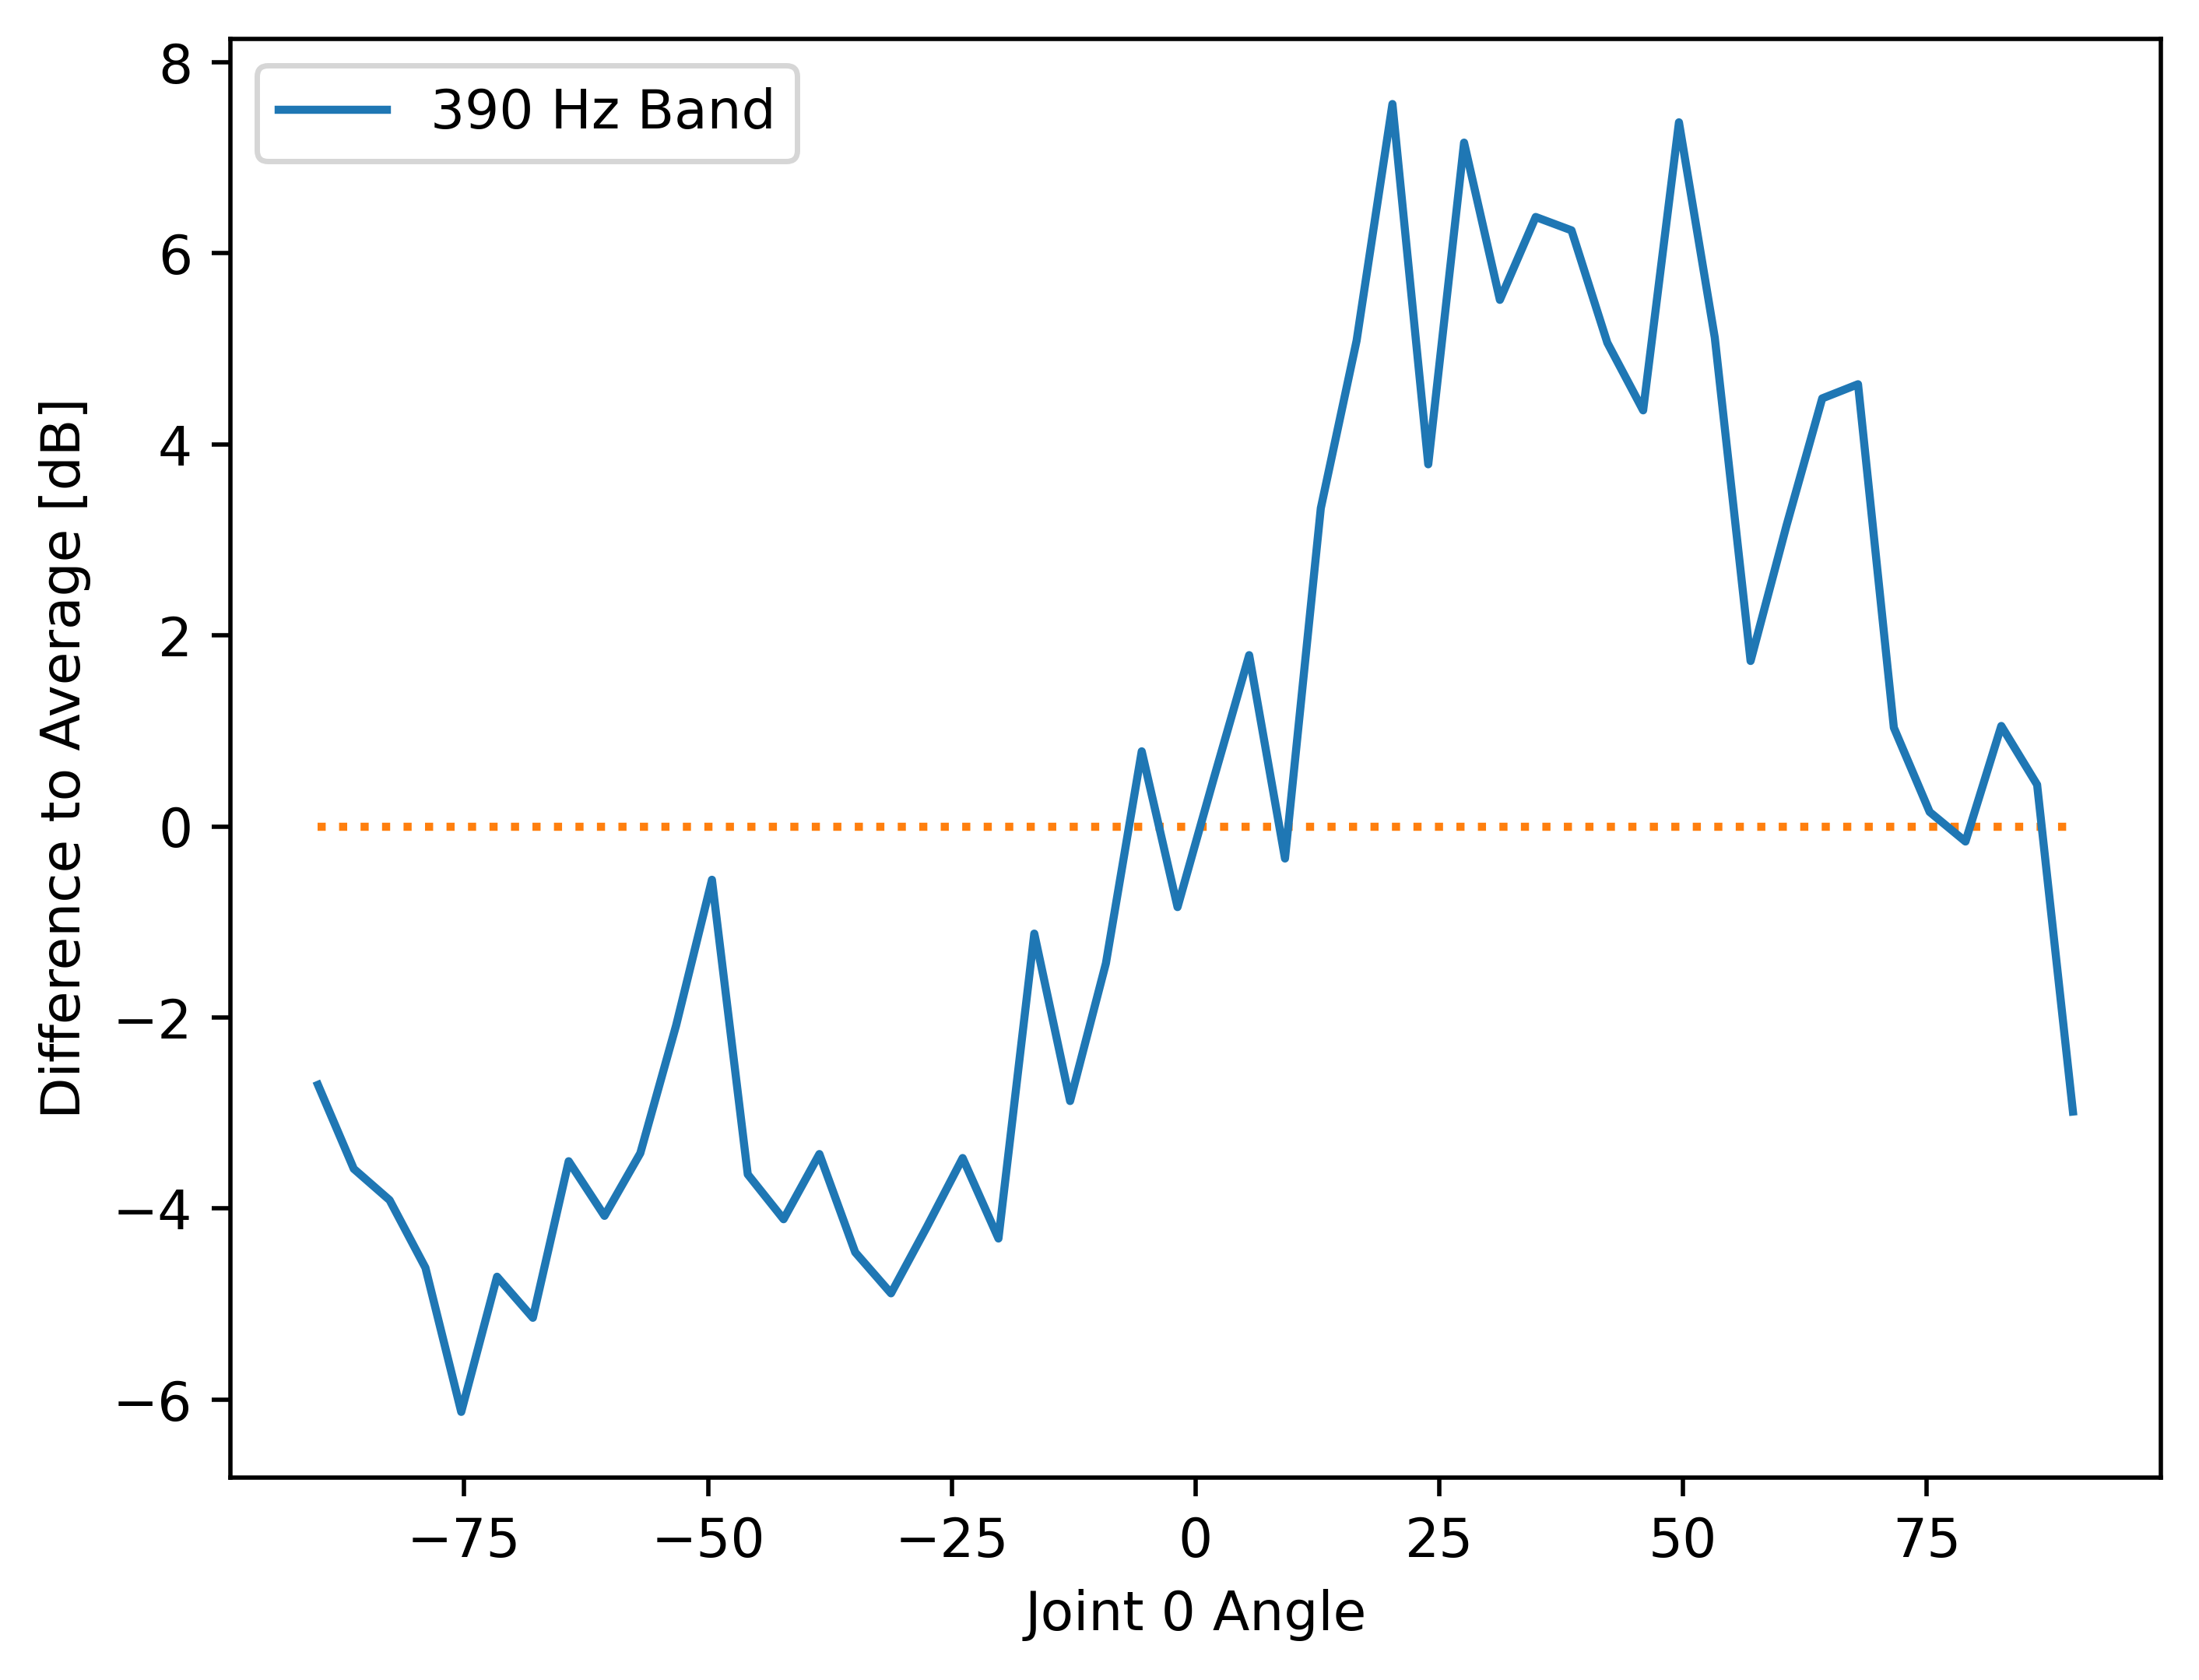

In [43]:

plt.plot((-90,90), (0,0), linestyle="dotted", c="C1")
plt.plot(angle,(S_db-np.mean(S_db, axis=1)[:,None])[100,:], label="390 Hz Band", c="C0")
plt.ylabel("Difference to Average [dB]")
plt.xlabel("Joint 0 Angle")
plt.legend()
plt.gcf().set_dpi(500)

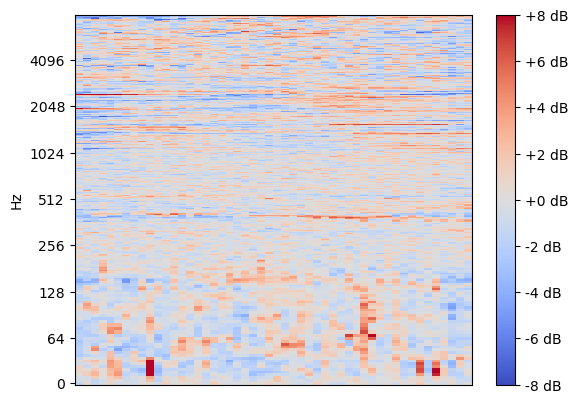

In [12]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db-np.mean(S_db, axis=1)[:,None], sr=sr, ax=ax, y_axis="log", n_fft=4096, vmin=-8, vmax=8) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

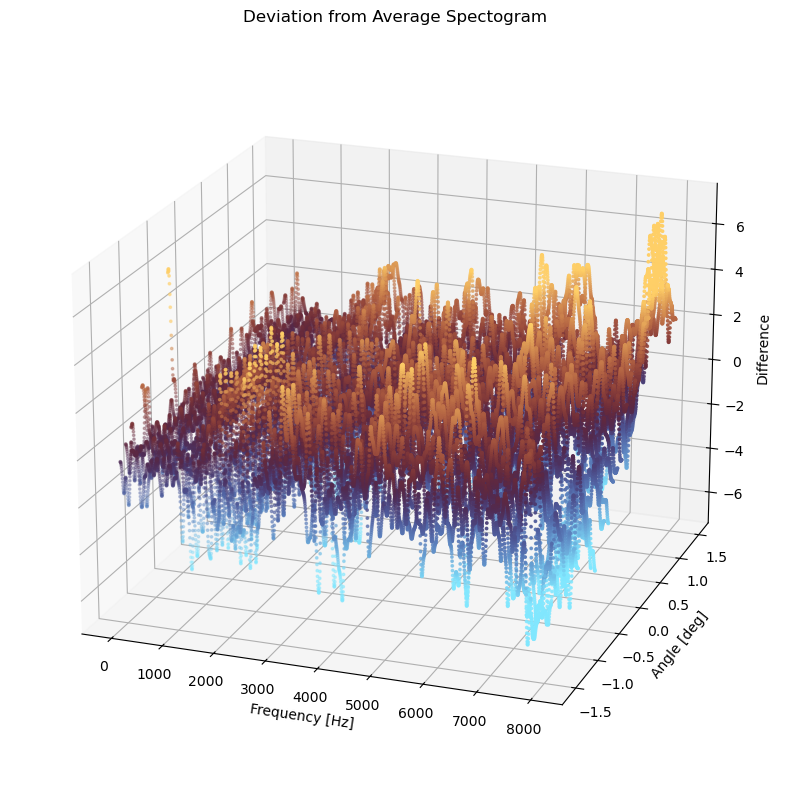

In [14]:
from scipy.ndimage import gaussian_filter1d
from cmcrameri import cm  # more colormaps, esp diverging w/black middle

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)


for i in range(32):
    spectrum = gaussian_filter1d(S_db[:,i] - avg, 5)
    angle = -1.57 + i*0.1
    ax.scatter(np.linspace(0,8000,len(spectrum)), angle, spectrum, c=spectrum, s=3, vmin=-4, vmax=4, cmap=cm.managua_r)#, c=gaussian_filter1d(np.log(X[i, :])-np.log(avg), 7))

# Labels and title
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(20,-70,0)


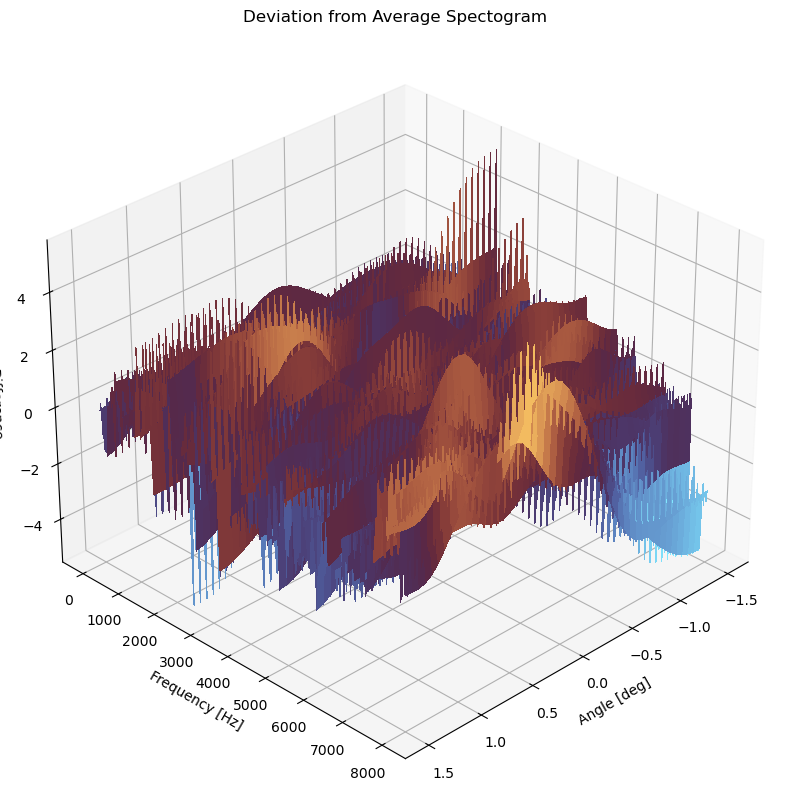

In [15]:
from scipy.ndimage import gaussian_filter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)[:,None]

S_db.shape

freq = np.linspace(0,8000,S_db.shape[0])
angle = np.linspace(-1.5,1.5,50)
x,y = np.meshgrid(angle,freq)


surf = ax.plot_surface(x,y, gaussian_filter((S_db- avg), sigma=3), cmap=cm.managua_r,#cmap="RdBu_r",
                       linewidth=0, antialiased=False, vmin = -4, vmax=4)

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(30, 45,0)